# Comparing clustering outputs based on diatom magnitude

## Importing

In [1]:
import xarray as xr
import numpy as np
 
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

## Loading Datasets

In [2]:
ds_clusters = xr.open_dataset('/data/ibougoudis/MOAD/files/clustering.nc')
clusters_dr0 = ds_clusters.Clusters_Drivers

diatom_clusters = xr.open_dataset('/data/ibougoudis/MOAD/files/clustering_diatom.nc')
clusters_d0 = diatom_clusters.Clusters_Diatom

ds_variables = xr.open_dataset('/data/ibougoudis/MOAD/files/integrated_original.nc')
diatom = ds_variables.Diatom

## Creating New Datasets

In [3]:
coords = dict(cluster=np.arange(0,6), time_counter=ds_clusters.time_counter) 

clusters_dr = xr.DataArray(coords=coords, dims = ['cluster', 'time_counter'])
clusters_d = xr.DataArray(coords=coords, dims = ['cluster', 'time_counter'])

for i in tqdm(coords.get('cluster')):
    
    clusters_dr[i]=diatom.where(clusters_dr0==i).mean(['x','y'])
    clusters_d[i]=diatom.where(clusters_d0==i).mean(['x','y'])

days = np.where(clusters_d.max('cluster') - clusters_dr.max('cluster') < 0)
days = list(days[0])

clusters_dr2 = diatom[days].where(clusters_dr0[days] == clusters_dr[:,days].idxmax('cluster'))
clusters_d2 = diatom[days].where(clusters_d0[days] == clusters_d[:,days].idxmax('cluster'))

  0%|          | 0/6 [00:00<?, ?it/s]

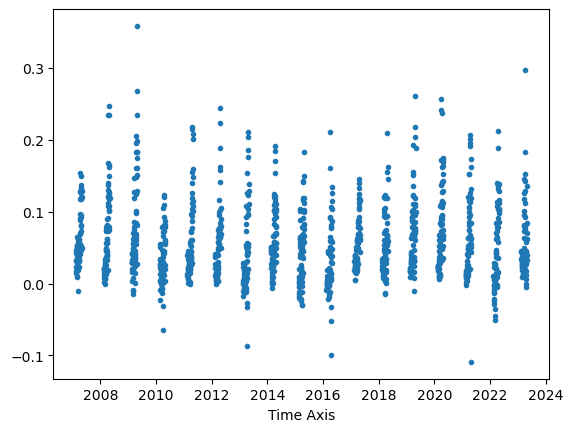

In [4]:
# Plotting the differences between the maximum diatom cluster for each day

(clusters_d.max('cluster') - clusters_dr.max('cluster')).plot( linestyle='', marker ='.')


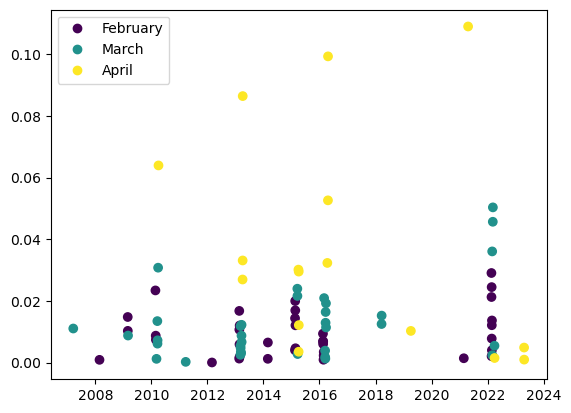

In [35]:
# Calculating the differences for these days

diff = clusters_dr[:,days].max('cluster') - clusters_d[:,days].max('cluster')
 
fig, ax = plt.subplots()

scatter= ax.scatter(clusters_dr2.time_counter, diff, c=diatom.time_counter[days].dt.month)
 
ax.legend(handles=scatter.legend_elements()[0], labels=['February','March','April'])

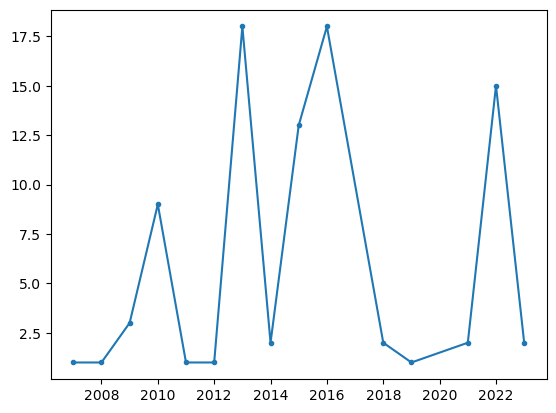

In [6]:
# Grouping by year

group = (clusters_dr[:,days].max('cluster') - clusters_d[:,days].max('cluster')).groupby(diatom[days].time_counter.dt.year)

plt.plot(np.unique(diatom[days].time_counter.dt.year),group.count(), marker='.')

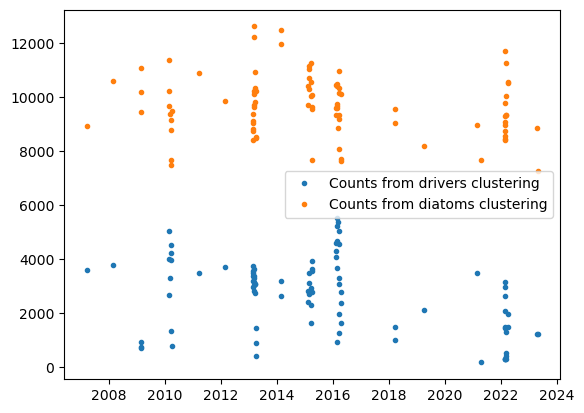

In [7]:
# Calculating the counts for all the days where the mean diatom was bigger for the clustering performed by the drivers
   
counts_dr = (clusters_dr2.count(['x', 'y']).values).astype(int)
counts_d = (clusters_d2.count(['x', 'y']).values).astype(int)

fig, ax = plt.subplots()
ax.plot(diatom.time_counter[days], counts_dr, marker='.', linestyle='', label= 'Counts from drivers clustering')
ax.plot(diatom.time_counter[days], counts_d, marker='.', linestyle='', label= 'Counts from diatoms clustering')
ax.legend()


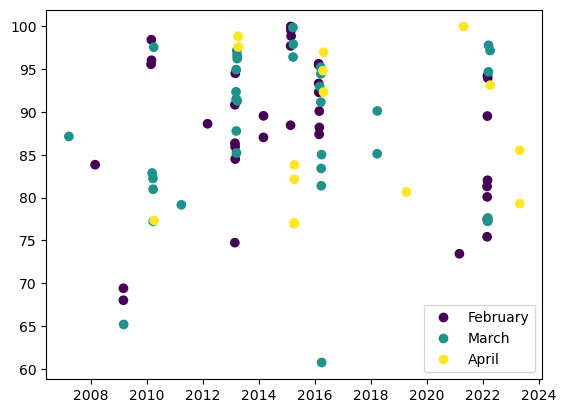

In [13]:
# Calculating the percentage of overlapping points between the clusters with maximum mean diatom values for each case

perc = np.round((clusters_dr2.where(clusters_dr2==clusters_d2).count(['x','y']).values).astype(int) / (clusters_dr2.count(['x','y']).values).astype(int) * 100, 2)

fig, ax = plt.subplots()

scatter= ax.scatter(clusters_dr2.time_counter, perc, c=diatom.time_counter[days].dt.month)
 
ax.legend(handles=scatter.legend_elements()[0], labels=['February','March','April'])

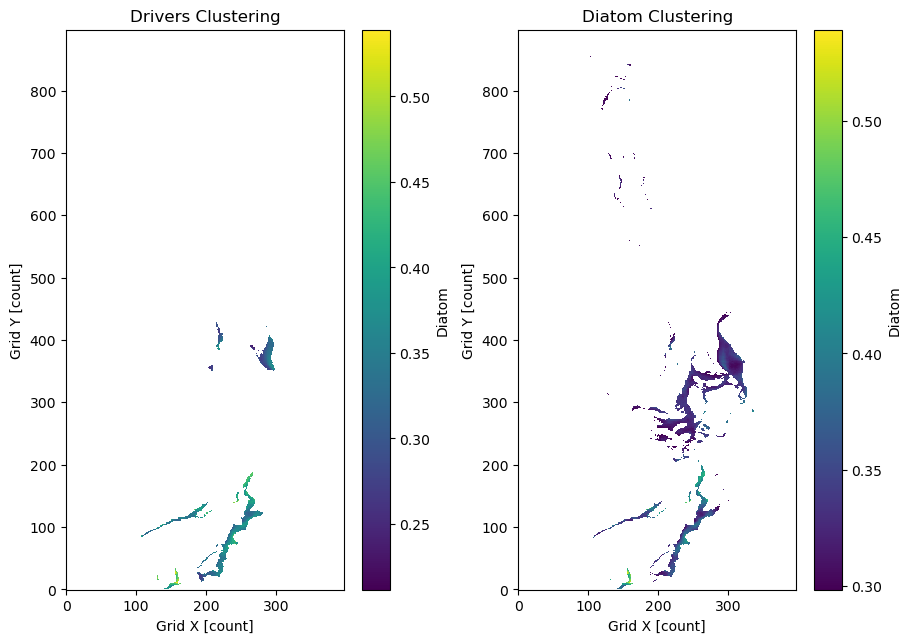

In [9]:
# Plotting of the first day

fig, ax = plt.subplots(1,2, figsize = (10,7))

plt.subplots_adjust(left=0.1,
    bottom=0.1, 
    right=0.9, 
    top=0.9, 
    wspace=0.3, 
    hspace=0.15)

clusters_dr2[0].plot(ax = ax[0])
clusters_d2[0].plot(ax = ax[1])

ax[0].title.set_text('Drivers Clustering')
ax[1].title.set_text('Diatom Clustering')

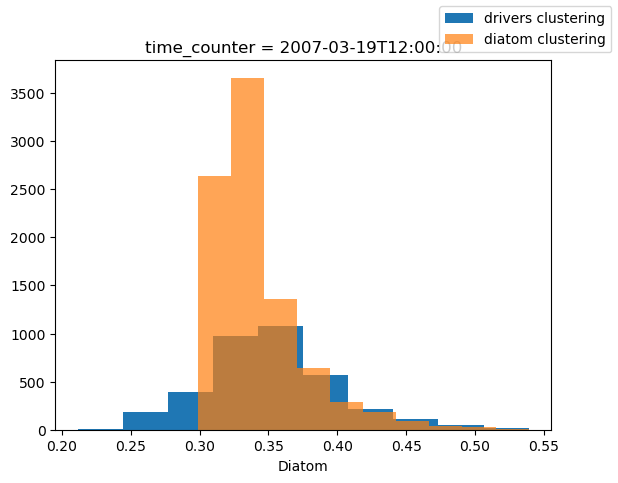

In [10]:
# Plotting the histogram of the first day

fig, ax = plt.subplots()

xr.plot.hist(clusters_dr2[0],ax=ax, label='drivers clustering')
xr.plot.hist(clusters_d2[0], alpha=0.7, label = 'diatom clustering')
fig.legend()
